# Simple Linear Regression


## Acknowledgements
This dataset can be found on Kaggle at this link:  
https://www.kaggle.com/mustafaali96/weight-height?select=weight-height.csv

## Imports

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Getting the data

In [157]:
df = pd.read_csv('data/weight-height.csv')
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 195.4+ KB


In [159]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [160]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

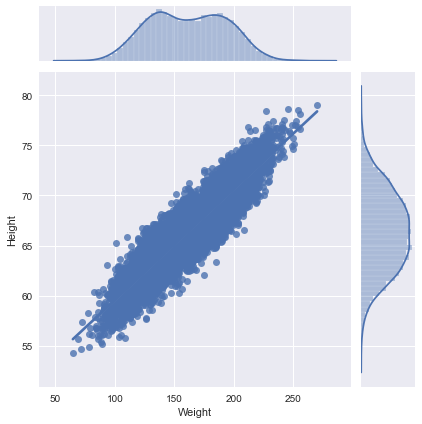

In [161]:
sns.jointplot(x='Weight', y='Height', data=df, kind='reg')

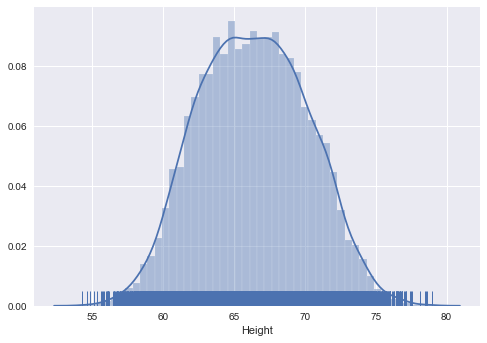

In [171]:
sns.distplot(df['Height'],rug=True)

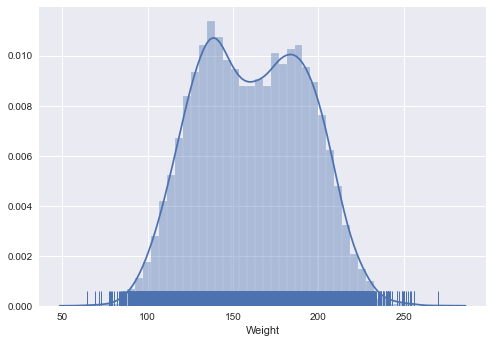

In [173]:
sns.distplot(df['Weight'], rug=True)

Text(0, 0.5, 'Frequency')

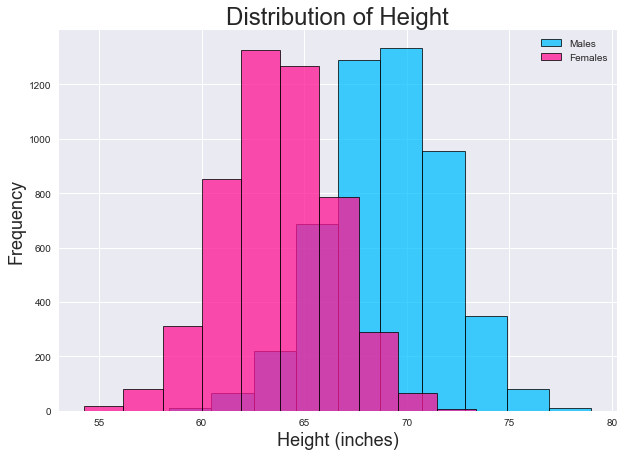

In [195]:
male = df[df['Gender'] == 'Male']
female = df[df['Gender'] == 'Female']

male.Height.plot(kind='hist', color='deepskyblue', edgecolor='black', linewidth=1, alpha=0.75, figsize=(10, 7))
female.Height.plot(kind='hist', color='deeppink', edgecolor='black',linewidth=1, alpha=0.75, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Height (inches)', size=18)
plt.ylabel('Count', size=18)

Text(0, 0.5, 'Count')

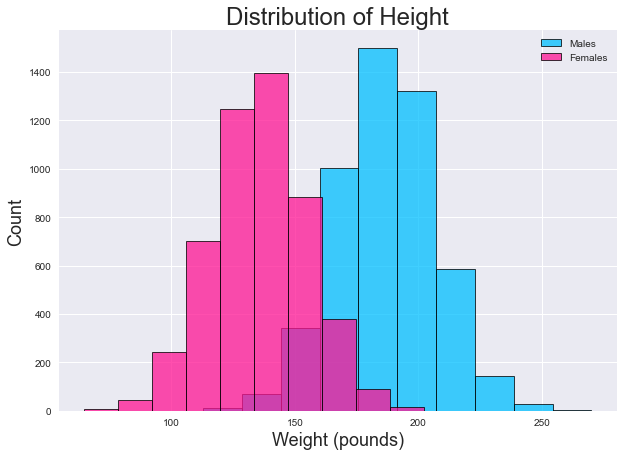

In [196]:
male.Weight.plot(kind='hist', color='deepskyblue', edgecolor='black', linewidth=1, alpha=0.75, figsize=(10, 7))
female.Weight.plot(kind='hist', color='deeppink', edgecolor='black',linewidth=1, alpha=0.75, figsize=(10, 7))
plt.legend(labels=['Males', 'Females'])
plt.title('Distribution of Height', size=24)
plt.xlabel('Weight (pounds)', size=18)
plt.ylabel('Count', size=18)

In [250]:
X = df.iloc[:, 1:2]
y = df.iloc[:, 2:3]

In [251]:
from sklearn.model_selection import train_test_split
# Splitting the male data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [252]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [253]:
y_pred = model.predict(X_test)

In [254]:
y_pred

array([[179.25411946],
       [180.34765156],
       [161.63849193],
       ...,
       [188.45953085],
       [129.84456058],
       [201.11830118]])

## Visualizations

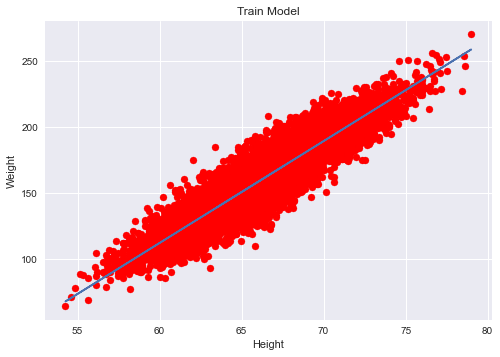

In [255]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, model.predict(X_train))
plt.title("Train Model")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

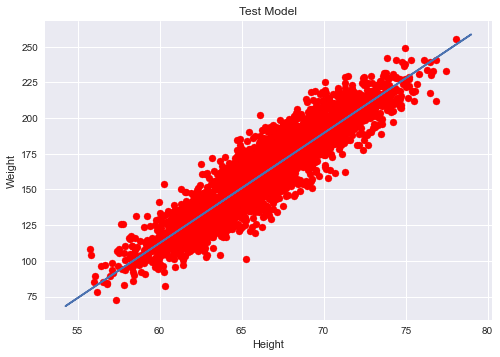

In [256]:
plt.scatter(X_test, y_test, color='red')
plt.plot(X_train, model.predict(X_train))
plt.title("Test Model")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.show()

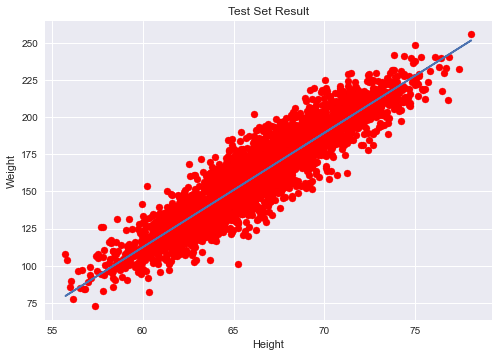

In [257]:
plt.scatter(X_test,y_test,color='red')
plt.plot(X_test,y_pred)
plt.title('Test Set Result')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## How do we evaluate a model?

A common method to measure the performance of a regression model is using the Root Mean Square Error (RMSE).  The RMSE is a measure of the differences between values, of either the sample or population data, predicted by a model and the observed values. 
The equation of the RMSE is as follows:

$RMSE = \sqrt{\frac{\sum_{i=1} ^ n (y_i - \hat{y}_i)^2}{n} } $

Where:
* $y_i$ represents the true values observed
* $\hat{y}_i$ represents the predicted values
* $n$ is the sample population or could also be $N$ which is the population total

The RMSE is the square root of the Mean Square Error (MSE). The MSE can be defined as the average of squared differences between the predicted and true output. 

The equation of the MSE is as follows:

$MSE = \frac{\sum_{i=1} ^ n (y_i - \hat{y}_i)^2}{n} $

When working with a model, it is usually easier to minimize the MSE, than the RMSE. This is ok however, since they will lead to the same result. As shown above, the RMSE is the squared root of the MSE.

We will also use the $R^2$ coefficient, which represents the proportion of variance in the outcome that our model is capable of predicting based on its features.

The equation for $R^2$:

$R^2 = 1 - \frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\bar{y}_i)^2}$

where:

$ \bar{y} = \frac{1}{n_{samples}}\sum y_i $ 

In [258]:
from sklearn.metrics import r2_score, mean_squared_error

In [259]:
r2 = r2_score(y_pred, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'R2 Score {r2}')
print(f'Mean Squared Error {mse}')
print(f'Root Mean Squared Error {rmse}')

R2 Score 0.8310382583358427
Mean Squared Error 148.3622953279399
Root Mean Squared Error 12.180406205375085


This result is not bad, the closer we have an R-Squared value to one the better, so about 83.1% is a good start for a simple linear regression model!